# Building a CAGR Calculator with Python
#### Dr. Love Saini,  Ph.D. 

## What is CAGR?

Suppose we made an investment of $S^0$ dollars in a risky security, that grows to worth $S^t$ dollars after $n$ periods. Now how will we judge the quality of this investment?

One of the approaches is to ask that how much more did we make compared to someone who invested $S^0$ in a risk free security for exactly same stretch of time as we did. In other words, we will determine a virtual rate of interest it would have taken an initial deposit of $S^0$ to grow into $S^t$ dollars risk free. For example, suppose a an initial investment of $\$500$ in X shares of a stock grows to be worth $\$5000$ in 5 years. What is the rate of interest that might have led to same success with a risk free bank deposit over the same stretch of time?

If we let $R^c$ denote the needed rate, then

$$ 5000 = (1+R^c)^5 (500) $$

The $R^c$ is thus :

$$ R^c = \big( \frac{5000}{500} \big)^{\frac{1}{5}} -1 $$

In literature, the $R^c$ is referred to as Compound(C) Annual(A) Growth(G) Rate(R), and defined with following formula: 

$$CAGR = \big(\frac{EV}{BV}\big)^{1/n}-1$$

Where:
* EV - investment's ending value (EV) 
* BV - investment’s beginning value (BV). 
* n  - the number of years. 

In this tutorial, we will show how to design a simple CAGR calculator using Python language. We will also demonstrate its use with some real life examples.

In [1]:
def get_CAGR(v1,v2,nYears):
    '''
    v1 : Initial value of the investment.
    v2 : Final value of the investment.
    nYears : Duration of the investment.
    '''
    v_grow = float(v2)/v1
    cagr   = v_grow**(1./nYears) - 1
    return cagr

We will use $\textbf{pandas_datareader}$ to download stock quotes from yahoo finance. 

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

# Netflix, Amazon.com, Apple, Starbucks, Nike, Google, Disney
stock_tickers = ['NFLX','AMZN','AAPL','SBUX','NKE','GOOGL','DIS']

# Where do we pull data from?
data_source = 'yahoo'

# How much data do we want?
start = '2008-1-1'
end   = '2017-12-31'

# load data
df = DataReader(stock_tickers, data_source, start ,end)['Close']

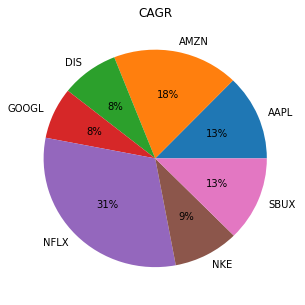

In [3]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#Get stock names
col = list(df.columns)

#calculate CAGR
cagr_list = [get_CAGR(df.loc[:,c][-1], df.loc[:,c][0], years) for c in col]

#let us look at pie chart 
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ax1.set_title('CAGR')
ax1.pie(cagr_list, labels=col, autopct='%.0f%%')
plt.show()

** Since 2008 until now, 31% annual growth rate from NetFlix, 18% from Amazon, 13% from Apple and Star-Bucks, marvelous! **

###  Let us now check how much we would have made now, if we made an investment of 10,000 dollars in stocks of these giant companies mentioned above.

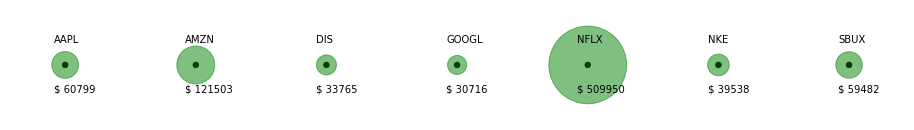

In [4]:
# investment 10 years ago
invested = 10000.0

#Calculate total cash after 10 years
future = [invested * (1+cagr)**years for cagr in cagr_list]

#let us plot these future returns
import matplotlib.pyplot as plt

circles= []
for item in future:
    circles.append(plt.Circle((0, 0), np.sqrt(item/10000.0), color='green', alpha=0.5 ))

fig, axes = plt.subplots(1,7, figsize=(16,2)) 

for am, cname, c, ax in zip(future, col, circles,axes):
    initcircle = plt.Circle((0, 0), 0.5, color='black')
    ax.add_artist(initcircle)
    ax.add_artist(c)
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.annotate(cname, (-2,4))
    ax.annotate('$ '+str(int(am)), (-2,-5))
    
plt.show()

In these charts, the internal black dots are equivalent to an initial investment of $1000, and the green dots represents the present value of that investment. Note that more the area of green circle, the more is the return on investment. 

**I wish I had invested $10,000 in NetFlix in 2008, and I might have made half-a-million today !**

These are very simple calculations that doesn't consider reinvestment of dividends and many other real-life stock investment fees, split-adjustment etc., so please don't take this as an advice, this is just fun exercise!

